<a href="https://colab.research.google.com/github/Ahsanhabib1080/MLCoronaPredictorBangladesh/blob/main/BangladeshCovid19Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **All The Imports**

In [2]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

# **Mount GDrive**

In [12]:
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


# **DATA LOADING**

In [13]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Covid19_data.csv', sep=',')
data = data[['Listofcase', 'total_cases']]
# We're specifying which column we're talking about.
print('-' * 10);print('Head');print('-' * 10);
print(data.head())

----------
Head
----------
   Listofcase  total_cases
0           1            3
1           2            3
2           3            3
3           4            3
4           5            3


# **DATA PREPARING**

----------
PREPARING DATA
----------


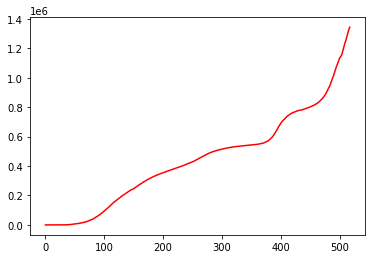

In [17]:
print('-' * 10);print('PREPARING DATA');print('-' * 10)
# Converting column values to numpy arrays.
x = np.array(data['Listofcase']).reshape(-1, 1)
y = np.array(data['total_cases']).reshape(-1, 1)
plt.plot(y, '-r')
polyfeature = PolynomialFeatures(degree=6)
# it will take x and will multiply it by degree.
x = polyfeature.fit_transform(x)
# fit_transform will add more columns to it.

# **DATA TRAINING**

In [18]:
print('-' * 10);print('TRAINING DATA');print('-' * 10)
# Creating Linear Model
model = linear_model.LinearRegression()
model.fit(x, y)
accuracy = model.score(x, y)
print(f'Accuracy: {round(accuracy * 100, 3)} %')
y0 = model.predict(x)

----------
TRAINING DATA
----------
Accuracy: 99.491 %


# **DATA PREDICTION**

----------
PREDICTING DATA
----------
----------
DATASET AVAILABLE TILL August 5'th 
Total 516 Days of Data Available
----------
How many days after you want to predict ? :1
Prediction - Total Cases after 517 days:1305045 Total Cases


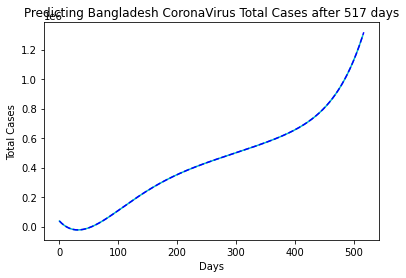

In [21]:
# ----PRINTING----
print('-' * 10);
print('PREDICTING DATA');
print('-' * 10)
print('-' * 10);
print("DATASET AVAILABLE TILL August 5'th \nTotal 516 Days of Data Available");
print('-' * 10)
# ----PRINTING----
days =  int(input("How many days after you want to predict ? :"))  # added 1+ for better Accurate Predictions
print(f'Prediction - Total Cases after {516 + days} days:', end='')
print(round(int(model.predict(polyfeature.fit_transform([[516 + days]]))), 2),'Total Cases')
# x1 is creating a list of total cases range and reshape it.
x1 = np.array(list(range(1, 516 + days))).reshape(-1, 1)
# y1 is predicting and saving the data according to x1.
y1 = model.predict(polyfeature.fit_transform(x1))
# ploting the data to the graph.
plt.plot(y1, 'c')
plt.plot(y0, '--b')
plt.xlabel('Days')
plt.ylabel('Total Cases')
plt.title(f'Predicting Bangladesh CoronaVirus Total Cases after {516 + (days)} days')
plt.show()